# League of Legends 

## Holon Institute Technology

## Data Science Final Project

### Submitted by Leon Sonts - 312327265  & Amit Salman - 312329121
### Practitioner - Idan Tobis

In [128]:
from IPython.display import Image
Image(url = "https://notagamer.net/wp-content/uploads/2019/05/Best-League-of-Legends-Wallpapers-5_4d470f76dc99e18ad75087b1b8410ea9.jpg")

# Background
## League of Legends is a MOBA (Multiplayer Online Battle Arena) game, the game has been out since October 27th, 2009.
## The Game has over 160 playable character and it's currently the one of the most played online game with a community of over 180 million players accordingly to 2022.

## In-game information:
### The game is built around a map called Summoner's Rift, although it has numerous maps and modes, Summoner's Rift remains the main battle map used. The game consists of 2 five-summoners teams, each placed in a different corner of the map, Red and blue team. Each team member has a specific and unique role, and these roles are the following:

## Top Laner - Placed in the upper part of the map. Usually a champion with high sustainability and his main goal is to gain map control by split pushing lanes in the mid/late game and also participant in team fights.

## Jungler - Does not belong to a specific lane, rather he uses the rest of the map for his gameplay. His main goal is to contest over objectives such as Drakes, Rift Heralds, Barons and more. His main resources are gained by killing jungle monsters.

## Mid Laner - Placed in the middle part of the map. His main goal is to roam over the map and grant his teammates slight advantage by participate in fights over kills or objectives.

## ADC - Placed in the bottom part of the map alongside the Support, Stands for Attack Damage Carry. Usually a ranged champion with high damage output. His main goal is smart positioning in team fights, deal as much damage as possible and get stronger by kill participation and farming minions.

## Support- Placed in the bottom part of the map alongside the ADC. His main goal is to support his teammates and defend his ADC at all cost!


### The game ends when a team destroys the enemy's team "Nexus" The core of the game which is protected by Turrets and inhibitors. The "Nexus" is responsible for the minions spawn. A team can also win if the enemy's team choose to surrender. 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets explore our data sets


### Here's a sample of champions data set, each instance is unique with his features

In [88]:
champions = pd.read_csv('champions_extended.csv')
champions.head(10)

,name,title,id,tags,Tier,Win Rate,Role
0,Aatrox,the Darkin Blade,266,"['Fighter', 'Tank']",B,49.88%,Top
1,Ahri,the Nine-Tailed Fox,103,"['Mage', 'Assassin']",S+,50.12%,Middle
2,Akali,the Rogue Assassin,84,['Assassin'],D,49.09%,Middle
3,Akshan,the Rogue Sentinel,166,"['Marksman', 'Assassin']",S,50.67%,Middle
4,Alistar,the Minotaur,12,"['Tank', 'Support']",C,48.2%,Support
5,Amumu,the Sad Mummy,32,"['Tank', 'Mage']",B,49.44%,Jungle
6,Anivia,the Cryophoenix,34,"['Mage', 'Support']",S+,51.8%,Middle
7,Annie,the Dark Child,1,['Mage'],A,50.52%,Middle
8,Aphelios,the Weapon of the Faithful,523,['Marksman'],D,45.82%,Bot
9,Ashe,the Frost Archer,22,"['Marksman', 'Support']",S,51.09%,Bot


### Sample of matches info data set

In [89]:
match_ids = pd.read_csv('match_ids_stats.csv')
match_ids.head()

,m_id,gameId,matchId,gameDuration,season,gameVersion
0,1,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
1,2,3145813789,EUN1_3145813789,1882,12,12.10.444.2068
2,3,5864679990,EUW1_5864679990,883,12,12.8.437.6765
3,4,3135617381,EUN1_3135617381,1778,12,12.9.439.127
4,5,3124970558,EUN1_3124970558,1684,12,12.8.437.6765


### Sample of team stats - Mainly objectives won over the opponent team 

In [90]:
team_stats = pd.read_csv('team_stats.csv')
team_stats.head()

,objectives.dragon.kills,objectives.inhibitor.kills,objectives.riftHerald.kills,objectives.tower.kills,win,teamId,m_id
0,1,2,1,9,1,1,1
1,3,0,0,6,0,2,1
2,1,0,0,2,0,3,2
3,4,4,2,11,1,4,2
4,0,0,0,1,0,5,3


### Now, Let's see how our main factors looks like and how many rows will be used as feature vectors for the ML model

In [91]:
games_stats = pd.read_csv('stats.csv')
print(games_stats.columns)
print("")
print(games_stats.info())
games_stats.head(10)

Index(['p_id', 'assists', 'baronKills', 'champLevel', 'championId',
       'damageDealtToObjectives', 'damageSelfMitigated', 'deaths',
       'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorTakedowns',
       'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced', 'win'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116220 entries, 0 to 116219
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   p_id                         116220 non-null  int64 
 1   assists                      116220 non-null  int64 
 2   baronKills                   116220 non-null  int64 
 3   cham

,p_id,assists,baronKills,champLevel,championId,damageDealtToObjectives,damageSelfMitigated,deaths,goldEarned,goldSpent,...,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,turretTakedowns,turretsLost,visionScore,wardsKilled,wardsPlaced,win
0,1,6,0,15,106,9537,27116,14,12118,12550,...,1559,0,170,266,3,6,14,3,9,1
1,2,6,1,16,107,33920,13950,1,16715,16675,...,13071,0,44,198,6,6,36,13,2,1
2,3,9,0,16,142,12018,8874,7,12954,13025,...,1094,0,188,160,3,6,33,11,13,1
3,4,9,0,15,67,14212,12361,6,13860,12760,...,1919,0,218,135,4,6,36,12,14,1
4,5,16,0,13,89,309,24154,7,7906,7750,...,403,0,36,188,0,6,61,8,33,1
5,6,8,0,17,887,6919,25542,4,13632,12850,...,5948,0,211,62,2,9,45,2,11,0
6,7,11,0,14,64,21541,27212,8,11748,11810,...,8022,0,28,508,3,9,30,4,19,0
7,8,8,0,16,7,2384,11681,5,13436,12450,...,3302,0,211,99,1,9,38,11,15,0
8,9,4,0,15,18,9910,11030,9,15928,15550,...,2032,0,246,37,2,9,17,6,9,0
9,10,15,0,13,497,412,19038,5,8227,8050,...,4759,1194,17,79,1,9,59,2,38,0


### So the main dataset has 29/32 features and over 116k row/ feature vectors. based on over 16k games, so we can assume that we have enough reliable data 

### Here is the data set that allows us to do kind of join between all the data sets so we can look at all the features combined when they are correlated to the right instances

In [92]:
participants_stats = pd.read_csv("participant_stats.csv")
participants_stats.head()

,p_id,t_id,m_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


### Here's a creation and customization of the dataframes we'll be working with, with dataframe includes team stats and the other one is without to further learn how these factors affects our prediction and outcome in real games

### Now lets have a look at them

In [93]:

df = pd.merge(participants_stats, games_stats, how="left", on=["p_id"], suffixes=("","_y"))
df = pd.merge(df, champions, how="left", left_on="championId", right_on="id", suffixes=("","_y"))
df = df.drop(['id'], axis=1)
df = pd.merge(df, match_ids, how="left", on=["m_id"], suffixes=("","_y"))
with_team_stats = pd.merge(df, team_stats, how="left", left_on=["m_id", "t_id", "win"], right_on=("m_id", "teamId", "win"))
with_team_stats = with_team_stats.drop(['teamId'], axis=1)
df

,p_id,t_id,m_id,assists,baronKills,champLevel,championId,damageDealtToObjectives,damageSelfMitigated,deaths,...,title,tags,Tier,Win Rate,Role,gameId,matchId,gameDuration,season,gameVersion
0,1,1,1,6,0,15,106,9537,27116,14,...,the Relentless Storm,"['Fighter', 'Tank']",S+,53.83%,Jungle,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
1,2,1,1,6,1,16,107,33920,13950,1,...,the Pridestalker,"['Assassin', 'Fighter']",A,50.53%,Jungle,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
2,3,1,1,9,0,16,142,12018,8874,7,...,the Aspect of Twilight,"['Mage', 'Support']",B,49.53%,Middle,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
3,4,1,1,9,0,15,67,14212,12361,6,...,the Night Hunter,"['Marksman', 'Assassin']",A,49.88%,Bot,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
4,5,1,1,16,0,13,89,309,24154,7,...,the Radiant Dawn,"['Tank', 'Support']",D,47.16%,Support,5899922822,EUW1_5899922822,1796,12,12.10.442.9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116215,116216,23244,11622,5,0,13,84,1651,14060,5,...,the Rogue Assassin,['Assassin'],D,49.09%,Middle,5928733142,EUW1_5928733142,1445,12,12.11.446.9344
116216,116217,23244,11622,7,0,16,203,44955,24157,2,...,The Eternal Hunters,['Marksman'],A,50.6%,Jungle,5928733142,EUW1_5928733142,1445,12,12.11.446.9344
116217,116218,23244,11622,6,0,13,50,3179,11202,6,...,the Noxian Grand General,"['Mage', 'Fighter']",B,48.97%,Support,5928733142,EUW1_5928733142,1445,12,12.11.446.9344
116218,116219,23244,11622,8,0,14,81,10038,4646,1,...,the Prodigal Explorer,"['Marksman', 'Mage']",D,49.39%,Bot,5928733142,EUW1_5928733142,1445,12,12.11.446.9344


### Here we clear duplicated and insignificant columns coming from merging the tables - duplicated keys with different names that comes from different dataset. Also getting rid of informative stats for the machine learning, for example gameVersion,  season, titles and so on has no impact on our learning and observation of the data, yet it is significant to correlated it to prove that the data is reliable

### Also creation new feature called KDA, (kills + assists) / deaths. deaths value cannot be zero, thats why we modify it

In [94]:
selected_features_df = df[['p_id','assists', 'baronKills', 'champLevel','damageDealtToObjectives', 'damageSelfMitigated',
       'deaths', 'goldEarned', 'goldSpent', 'individualPosition',
       'inhibitorTakedowns', 'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced', 'gameDuration', 'win']]
#Add a custom feature which is 'kda', (kills+assists)/deaths. deaths cannot be 0
selected_features_df['deaths'] = selected_features_df['deaths'].apply(lambda x: 1 if x==0 else x)
selected_features_df['KDA'] = (selected_features_df['kills'] + selected_features_df['assists'])/(selected_features_df['deaths'])
selected_features_df.columns


Index(['p_id', 'assists', 'baronKills', 'champLevel',
       'damageDealtToObjectives', 'damageSelfMitigated', 'deaths',
       'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorTakedowns',
       'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced', 'gameDuration', 'win', 'KDA'],
      dtype='object')

In [95]:
with_team_stats = with_team_stats[['p_id','assists', 'baronKills', 'champLevel','damageDealtToObjectives', 'damageSelfMitigated',
       'deaths', 'goldEarned', 'goldSpent', 'individualPosition',
       'inhibitorTakedowns', 'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced','objectives.dragon.kills', 'objectives.inhibitor.kills',
       'objectives.riftHerald.kills', 'objectives.tower.kills','gameDuration', 'win']]
with_team_stats['deaths'] = with_team_stats['deaths'].apply(lambda x: 1 if x==0 else x)
with_team_stats['KDA'] = (with_team_stats['kills'] + with_team_stats['assists'])/(with_team_stats['deaths'])
selected_features_df.columns

Index(['p_id', 'assists', 'baronKills', 'champLevel',
       'damageDealtToObjectives', 'damageSelfMitigated', 'deaths',
       'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorTakedowns',
       'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced', 'gameDuration', 'win', 'KDA'],
      dtype='object')

### Remove string values from dataset

In [123]:
#do the same with with_team_stats df
no_string_values = selected_features_df.copy()
no_string_values = no_string_values.drop(['individualPosition'],axis=1)
no_string_values.head()


,p_id,assists,baronKills,champLevel,damageDealtToObjectives,damageSelfMitigated,deaths,goldEarned,goldSpent,inhibitorTakedowns,...,totalMinionsKilled,totalTimeCCDealt,turretTakedowns,turretsLost,visionScore,wardsKilled,wardsPlaced,gameDuration,win,KDA
0,1,6,0,15,9537,27116,14,12118,12550,2,...,170,266,3,6,14,3,9,1796,1,0.714286
1,2,6,1,16,33920,13950,1,16715,16675,2,...,44,198,6,6,36,13,2,1796,1,18.000000
2,3,9,0,16,12018,8874,7,12954,13025,1,...,188,160,3,6,33,11,13,1796,1,2.428571
3,4,9,0,15,14212,12361,6,13860,12760,0,...,218,135,4,6,36,12,14,1796,1,2.500000
4,5,16,0,13,309,24154,7,7906,7750,1,...,36,188,0,6,61,8,33,1796,1,2.428571


In [124]:
no_string_values_with_team_stats = with_team_stats.copy()
no_string_values_with_team_stats = no_string_values_with_team_stats.drop(['individualPosition'],axis=1)
no_string_values_with_team_stats.head()

,p_id,assists,baronKills,champLevel,damageDealtToObjectives,damageSelfMitigated,deaths,goldEarned,goldSpent,inhibitorTakedowns,...,visionScore,wardsKilled,wardsPlaced,objectives.dragon.kills,objectives.inhibitor.kills,objectives.riftHerald.kills,objectives.tower.kills,gameDuration,win,KDA
0,1,6,0,15,9537,27116,14,12118,12550,2,...,14,3,9,1,2,1,9,1796,1,0.714286
1,2,6,1,16,33920,13950,1,16715,16675,2,...,36,13,2,1,2,1,9,1796,1,18.000000
2,3,9,0,16,12018,8874,7,12954,13025,1,...,33,11,13,1,2,1,9,1796,1,2.428571
3,4,9,0,15,14212,12361,6,13860,12760,0,...,36,12,14,1,2,1,9,1796,1,2.500000
4,5,16,0,13,309,24154,7,7906,7750,1,...,61,8,33,1,2,1,9,1796,1,2.428571


### Check for missing values 

In [125]:
no_string_values.isnull().sum()

p_id                           0
assists                        0
baronKills                     0
champLevel                     0
damageDealtToObjectives        0
damageSelfMitigated            0
deaths                         0
goldEarned                     0
goldSpent                      0
inhibitorTakedowns             0
killingSprees                  0
kills                          0
largestKillingSpree            0
longestTimeSpentLiving         0
timeCCingOthers                0
totalDamageDealtToChampions    0
totalDamageTaken               0
totalHeal                      0
totalHealsOnTeammates          0
totalMinionsKilled             0
totalTimeCCDealt               0
turretTakedowns                0
turretsLost                    0
visionScore                    0
wardsKilled                    0
wardsPlaced                    0
gameDuration                   0
win                            0
KDA                            0
dtype: int64

In [129]:
no_string_values_with_team_stats.isnull().sum()

p_id                           0
assists                        0
baronKills                     0
champLevel                     0
damageDealtToObjectives        0
damageSelfMitigated            0
deaths                         0
goldEarned                     0
goldSpent                      0
inhibitorTakedowns             0
killingSprees                  0
kills                          0
largestKillingSpree            0
longestTimeSpentLiving         0
timeCCingOthers                0
totalDamageDealtToChampions    0
totalDamageTaken               0
totalHeal                      0
totalHealsOnTeammates          0
totalMinionsKilled             0
totalTimeCCDealt               0
turretTakedowns                0
turretsLost                    0
visionScore                    0
wardsKilled                    0
wardsPlaced                    0
objectives.dragon.kills        0
objectives.inhibitor.kills     0
objectives.riftHerald.kills    0
objectives.tower.kills         0
gameDurati

## Predict Win/Lose - Positive/Negative classes based on features

### In the following steps we will first of all normalize our data, to gain more accurate prediction.
### We will use Logistics Regression model as our baseline model and then try to perform RFC to check if we get better results. We will test both datasets, with/without objective team stats and will see how it correlated to our prediction. Further more, We'll first run the model training and predicition on raw dataset and then we will remove features with low coefficient per feature to see if we can make our prediction even more accurate

In [130]:
from sklearn.preprocessing import Normalizer
y = no_string_values.win
X = no_string_values.drop('win',axis=1)
y2 = no_string_values_with_team_stats.win
X2 = no_string_values_with_team_stats.drop('win', axis=1)

norm_win = Normalizer()
norm_win_team = Normalizer()
norm_win = norm_win.fit_transform(X)
norm_win_team = norm_win_team.fit_transform(X2)

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Splitting our features and labels to train and test with 0.66 for train 0.33 for test
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=42)
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)
acc_score = log_reg.score(xtest,ytest)
print("Logistic Regression win/lose Accuracy Score: {}".format(acc_score))

Logistic Regression win/lose Accuracy Score: 0.795139884754778


In [135]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size=0.33,random_state=42)
log_reg2 = LogisticRegression()
log_reg2.fit(xtrain2,ytrain2)
acc_score = log_reg2.score(xtest2,ytest2)
print("Logistic Regression win/lose Accuracy Score: {}".format(acc_score))

Logistic Regression win/lose Accuracy Score: 0.79472270748051


In [136]:
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=42)
rfc = RandomForestClassifier(max_depth=10,random_state=42)
rfc.fit(xtrain,ytrain)
acc_score = rfc.score(xtest,ytest)
print("Random Forest Classifier win/lose Accuracy Score: {}".format(acc_score))

Random Forest Classifier win/lose Accuracy Score: 0.960524600422392


In [139]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size=0.33,random_state=42)
rfc2 = RandomForestClassifier(max_depth=10,random_state=42)
rfc2.fit(xtrain2,ytrain2)
acc_score = rfc2.score(xtest2,ytest2)
print("Random Forest Classifier win/lose Accuracy Score: {}".format(acc_score))

Random Forest Classifier win/lose Accuracy Score: 0.972779182854014


### We can see that RFC prediction is much better than logistic regression model, Lets explore the data via visualization and try to make the prediction even better 

In [140]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(xtest)
confusion_matrix = confusion_matrix(ytest,y_pred)
print(confusion_matrix)

[[18438   683]
 [  831 18401]]


In [148]:
from sklearn.metrics import confusion_matrix
y_pred2 = rfc2.predict(xtest2)
confusion_matrix2 = confusion_matrix(ytest2,y_pred2)
print(confusion_matrix2)

[[18512   609]
 [  435 18797]]


In [150]:
coef = list(sorted(zip(xtrain2.columns,abs(log_reg2.coef_[0])),key=lambda x: x[1]))
coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Features','Coefficient'])
print('Coefficient for every feature including the team stats features:\n')
print(coef_table)

Coefficient for every feature including the team stats features:

                       Features             Coefficient
0                    baronKills   5.803369812629039e-07
1                   wardsKilled  1.0718569418580533e-06
2                 killingSprees  2.2870513933727346e-06
3                          p_id   2.355235914016599e-06
4                    champLevel  2.6943617834211083e-06
5   objectives.riftHerald.kills   5.149211768320045e-06
6           largestKillingSpree   6.716114884076257e-06
7                         kills   8.408302458520257e-06
8   totalDamageDealtToChampions  1.0351651236433091e-05
9            inhibitorTakedowns  1.1389213257758873e-05
10        totalHealsOnTeammates  2.0544076580551767e-05
11                       deaths  2.0770556459492633e-05
12      objectives.dragon.kills  2.1985270652565135e-05
13   objectives.inhibitor.kills  2.2243973404855476e-05
14              turretTakedowns  3.2214488115175944e-05
15                          KDA   3.92

Text(0.5, 1.0, 'Correlations - win vs factors (all games)')

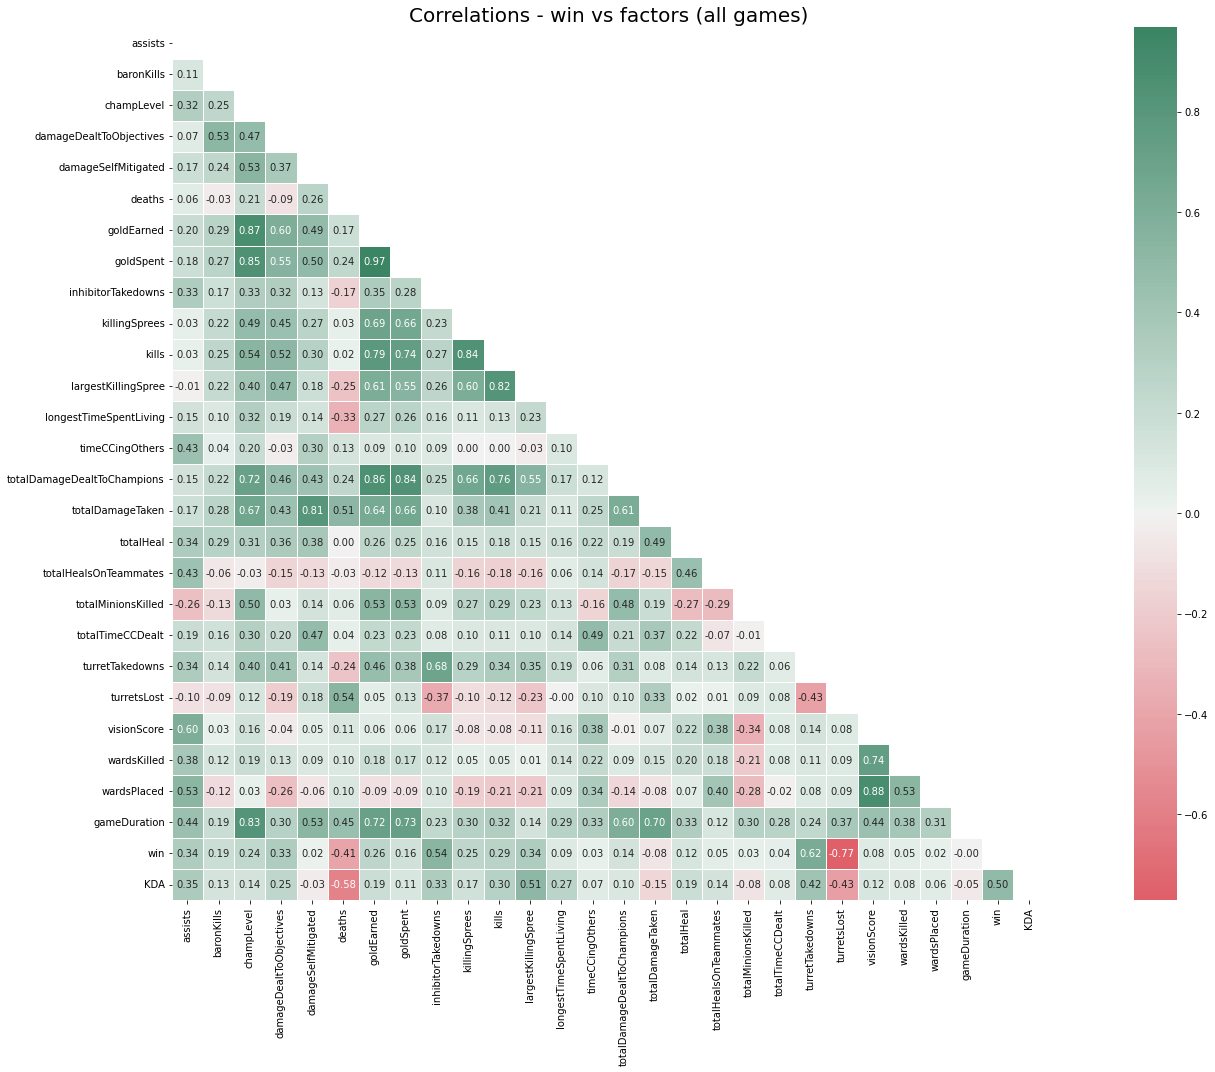

In [103]:
df_corr = selected_features_df._get_numeric_data()
df_corr = df_corr.drop(['p_id'],axis=1)

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (25,15))
sb.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (all games)',size=20)

In [ ]:
### Conclusions - feature reduction,  etc...

Text(0.5, 1.0, 'Correlations - win vs factors with team stats (all games)')

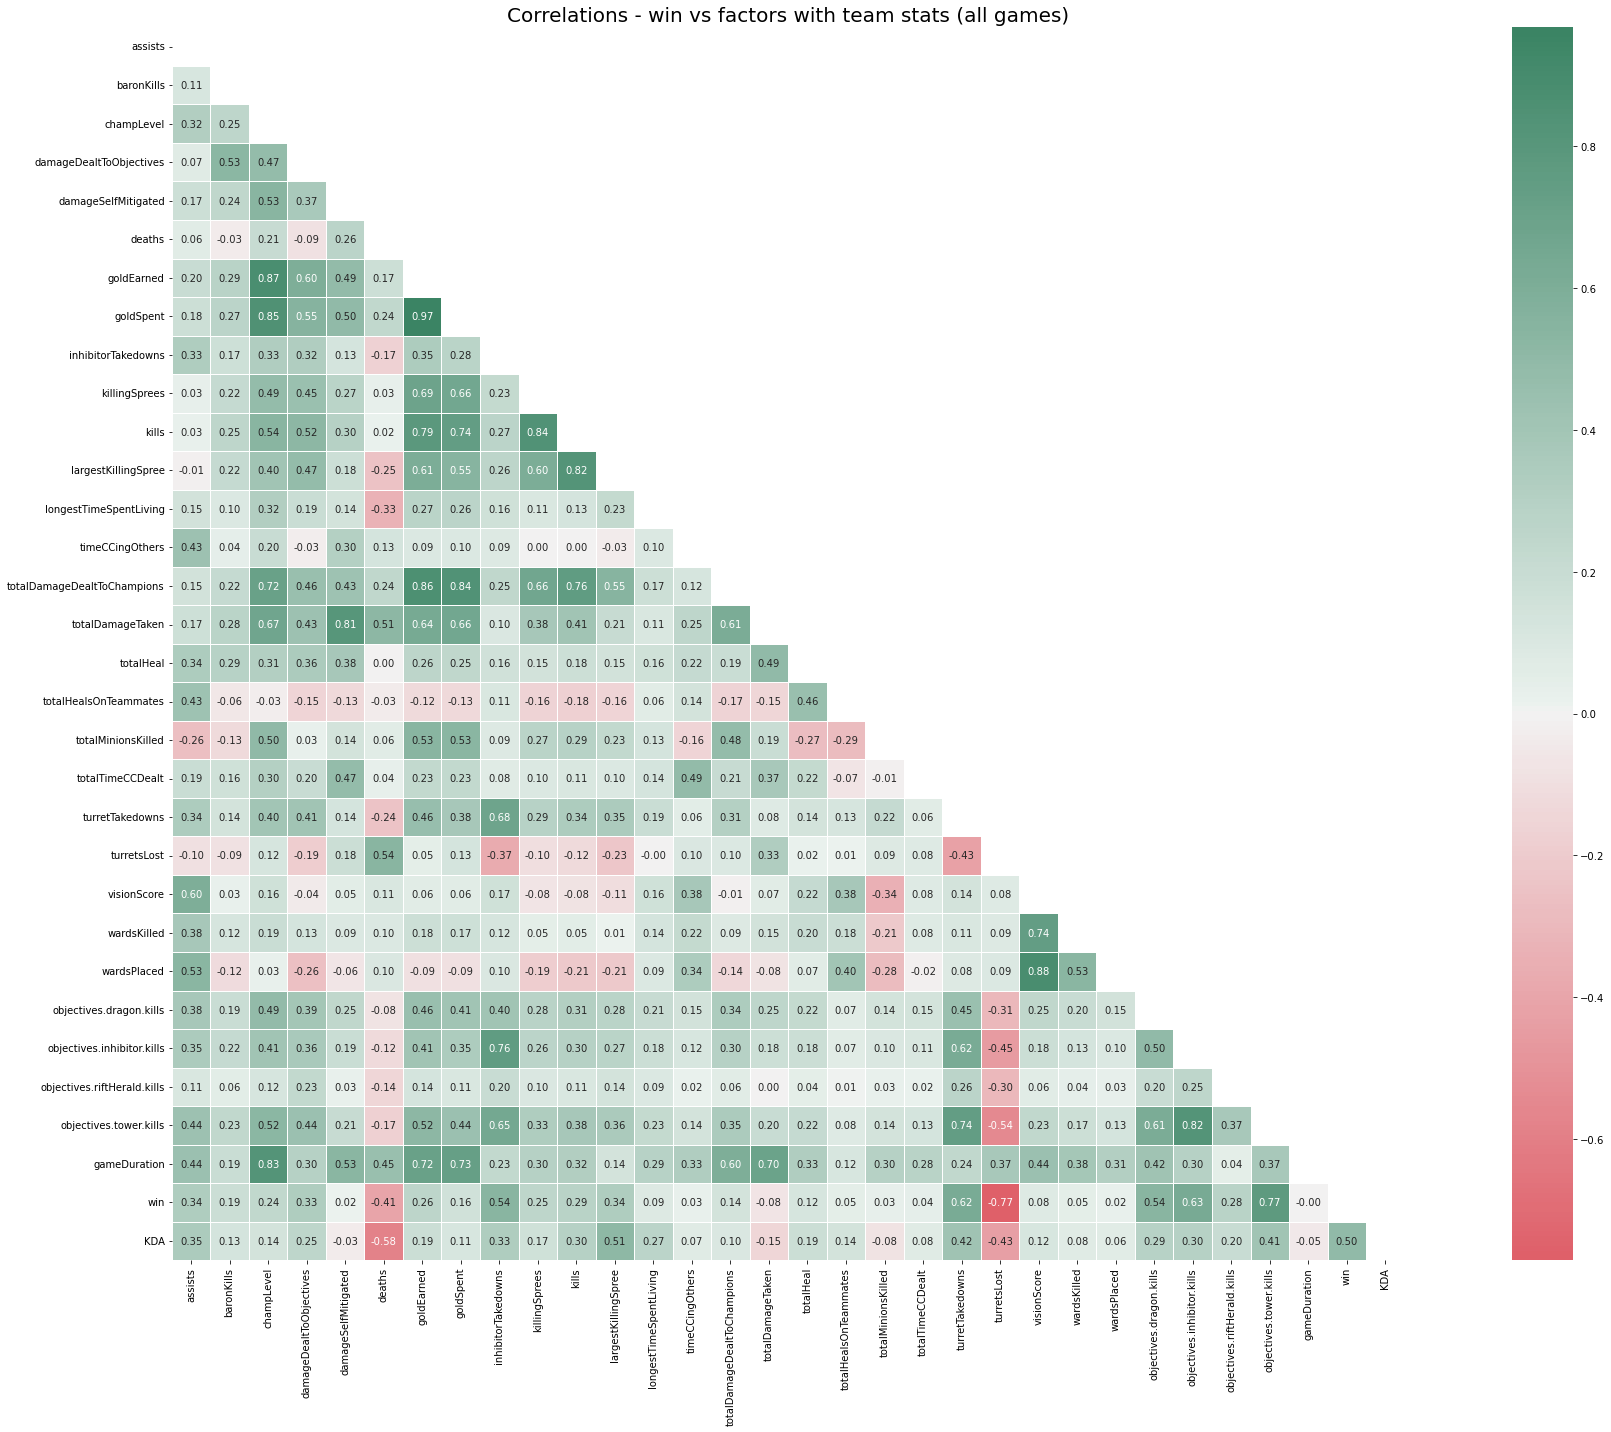

In [151]:
df_corr = with_team_stats._get_numeric_data()
df_corr = df_corr.drop(['p_id'],axis=1)

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (30,20))
sb.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors with team stats (all games)',size=20)

### Now as we see the heatmap representing the correlations of factors to win/lose result we can make conclusion:
### There are negative correlation features such as deaths, totalDamageTaken, turretsLost - If u get more of these you potentially not going to win the game
### The team stats are very highly positive correlated, so it mean that your performance as a team really matters, not just personal stats.
### There are with low correlated features such as wardPlaced, timeCCingOthers, damageSelfMitigated and more that can slower our model and even ruin our predict accuracy

### Lets try to predict win/lose based on thinner df with team stats, that proven to have better features to predict the outcome of the game

In [156]:
y3 = no_string_values_with_team_stats.win
#We drop all the low correlated features less than 0.1, positive or negative
X3 = no_string_values_with_team_stats.drop(['win', 'totalHealsOnTeammates', 'totalMinionsKilled','wardsKilled','wardsPlaced','timeCCingOthers', 'totalTimeCCDealt', 'gameDuration', 'totalDamageTaken', 'longestTimeSpentLiving'],axis=1)


xtrain3,xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size=0.33,random_state=42)
rfc3 = RandomForestClassifier(max_depth=10,random_state=42)
rfc3.fit(xtrain3,ytrain3)
acc_score = rfc3.score(xtest3,ytest3)
print("Random Forest Classifier win/lose Accuracy Score: {}".format(acc_score))

Random Forest Classifier win/lose Accuracy Score: 0.9725184470575965


### As a result we got a slghtly less accurate prediction but handling less features cause for the model to learn faster (not something so valuable in our opinion)

## Now we want to compare our real data that acquired from the data acquisition step to the data we scraped from https://u.gg/ which is a huge data website  of league of legends that provides insights to the players based on data collected and analyzed

In [163]:
# Customize data frames for plot visualization of top 10 for each role

jungle = df[df.individualPosition == 'JUNGLE']
jungle_count = jungle.name.value_counts()
top10jungle = jungle_count[:10]

top = df[df.individualPosition == 'TOP']
top_count = top.name.value_counts()
top10top = top_count[:10]

mid = df[df.individualPosition == 'MIDDLE']
mid_count = mid.name.value_counts()
top10mid = mid_count[:10]

adc = df[df.individualPosition == 'BOTTOM']
adc_count = adc.name.value_counts()
top10adc = adc_count[:10]

support = df[df.individualPosition == 'UTILITY']
support_count = support.name.value_counts()
top10support = support_count[:10]


games_count = len(match_ids.index)
print(games_count)

11622


In [158]:
# Customize data frames regarding the results above with the data we got from scraping

import collections
champs_features = champions[['id','name', 'Tier', 'Win Rate', 'tags']]
# Top 10 Top laners:
top10top_champs = champs_features[champs_features['name'].isin(list(dict(top10top).keys())
)]
ordered_dict = collections.OrderedDict(sorted(dict(top10top).items()))
top10top_champs['picked'] = np.array(list(ordered_dict.values()))
top10top_champs = top10top_champs.sort_values(by=['picked'], ascending=False)
top10top_champs.reset_index(drop=True, inplace=True)

# Top 10 Junglers:
top10jg_champs = champs_features[champs_features['name'].isin(list(dict(top10jungle).keys())
)]
ordered_dict = collections.OrderedDict(sorted(dict(top10jungle).items()))
top10jg_champs['picked'] = np.array(list(ordered_dict.values()))
top10jg_champs = top10jg_champs.sort_values(by=['picked'], ascending=False)
top10jg_champs.reset_index(drop=True, inplace=True)

# Top 10 Mid Laners:
top10mid_champs = champs_features[champs_features['name'].isin(list(dict(top10mid).keys())
)]
ordered_dict = collections.OrderedDict(sorted(dict(top10mid).items()))
top10mid_champs['picked'] = np.array(list(ordered_dict.values()))
top10mid_champs = top10mid_champs.sort_values(by=['picked'], ascending=False)
top10mid_champs.reset_index(drop=True, inplace=True)


# Top 10 ADC:
top10adc_champs = champs_features[champs_features['name'].isin(list(dict(top10adc).keys())
)]
ordered_dict = collections.OrderedDict(sorted(dict(top10adc).items()))
top10adc_champs['picked'] = np.array(list(ordered_dict.values()))
top10adc_champs = top10adc_champs.sort_values(by=['picked'], ascending=False)
top10adc_champs.reset_index(drop=True, inplace=True)


# Top 10 Support:
top10support_champs = champs_features[champs_features['name'].isin(list(dict(top10support).keys())
)]
ordered_dict = collections.OrderedDict(sorted(dict(top10support).items()))
top10support_champs['picked'] = np.array(list(ordered_dict.values()))
top10support_champs = top10support_champs.sort_values(by=['picked'], ascending=False)
top10support_champs.reset_index(drop=True, inplace=True)

 ### Now lets display more data according to our scrapted data


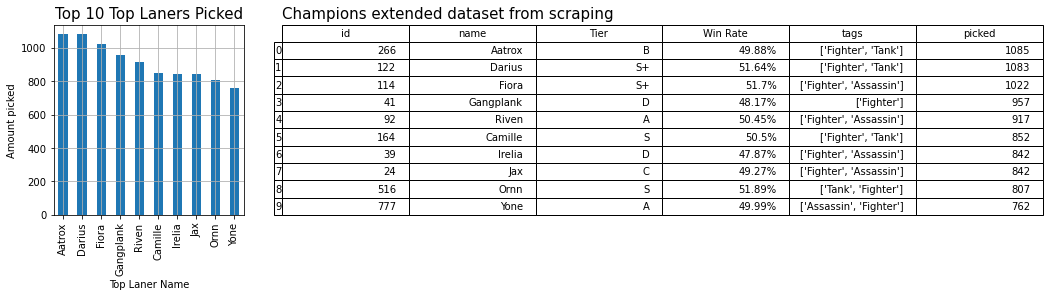

In [159]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1 = top10top.plot(kind='bar')
ax1 = plt.grid(True)
ax1 = plt.ylabel('Amount picked',size=10)
ax1 = plt.xlabel('Top Laner Name',size=10)
ax1 = plt.title('Top 10 Top Laners Picked',size=15)
ax2 = fig.add_subplot(122)
font_size = 10
bbox = [0, 0, 4, 1]
ax2.axis('off')
plt.title(label="Champions extended dataset from scraping", fontsize=15, loc='left')
mpl_table = ax2.table(cellText = top10top_champs.values, rowLabels = top10top_champs.index, bbox=bbox, colLabels=top10top_champs.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)


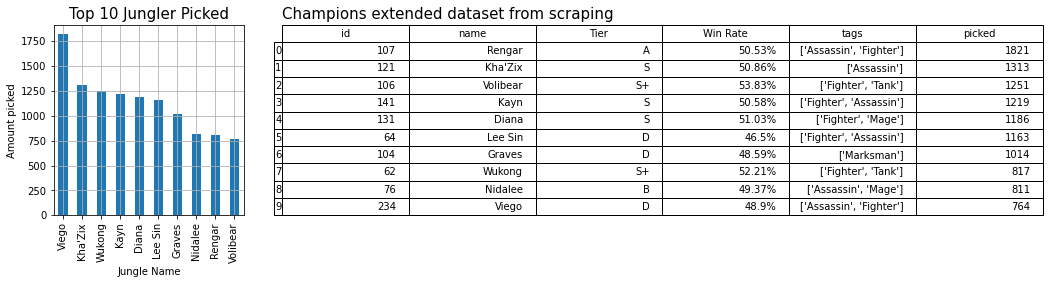

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1 = top10jungle.plot(kind='bar')
ax1 = plt.grid(True)
ax1 = plt.ylabel('Amount picked',size=10)
ax1 = plt.xlabel('Jungle Name',size=10)
ax1 = plt.title('Top 10 Jungler Picked',size=15)
ax2 = fig.add_subplot(122)
font_size = 10
bbox = [0, 0, 4, 1]
ax2.axis('off')
plt.title(label="Champions extended dataset from scraping", fontsize=15, loc='left')
mpl_table = ax2.table(cellText = top10jg_champs.values, rowLabels = top10jg_champs.index, bbox=bbox, colLabels=top10jg_champs.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

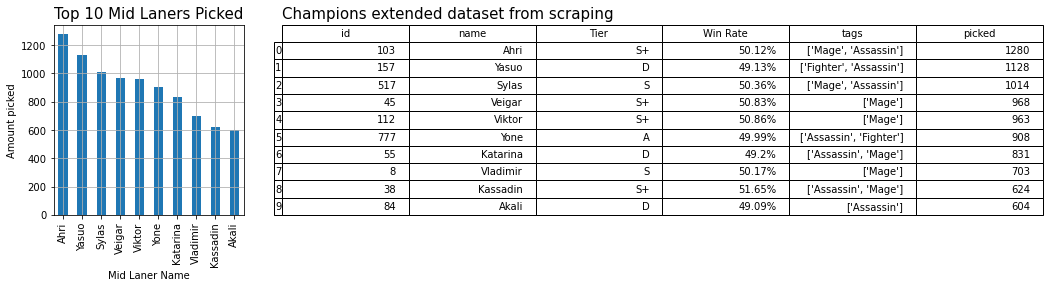

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1 = top10mid.plot(kind='bar')
ax1 = plt.grid(True)
ax1 = plt.ylabel('Amount picked',size=10)
ax1 = plt.xlabel('Mid Laner Name',size=10)
ax1 = plt.title('Top 10 Mid Laners Picked',size=15)
ax2 = fig.add_subplot(122)
font_size = 10
bbox = [0, 0, 4, 1]
ax2.axis('off')
plt.title(label="Champions extended dataset from scraping", fontsize=15, loc='left')
mpl_table = ax2.table(cellText = top10mid_champs.values, rowLabels = top10mid_champs.index, bbox=bbox, colLabels=top10mid_champs.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

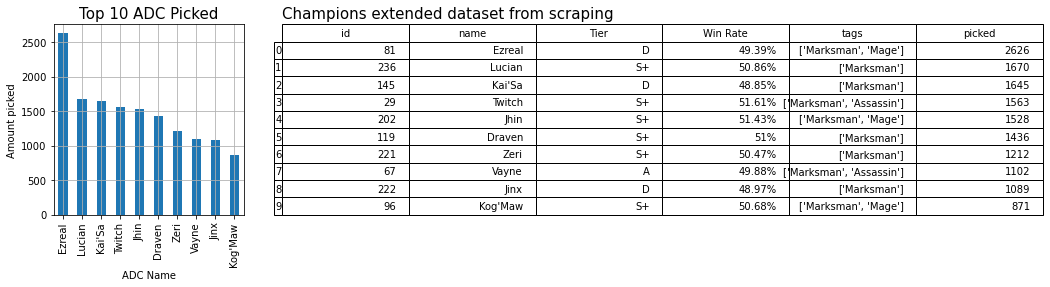

In [110]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1 = top10adc.plot(kind='bar')
ax1 = plt.grid(True)
ax1 = plt.ylabel('Amount picked',size=10)
ax1 = plt.xlabel('ADC Name',size=10)
ax1 = plt.title('Top 10 ADC Picked',size=15)
ax2 = fig.add_subplot(122)
font_size = 10
bbox = [0, 0, 4, 1]
ax2.axis('off')
plt.title(label="Champions extended dataset from scraping", fontsize=15, loc='left')
mpl_table = ax2.table(cellText = top10adc_champs.values, rowLabels = top10adc_champs.index, bbox=bbox, colLabels=top10adc_champs.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

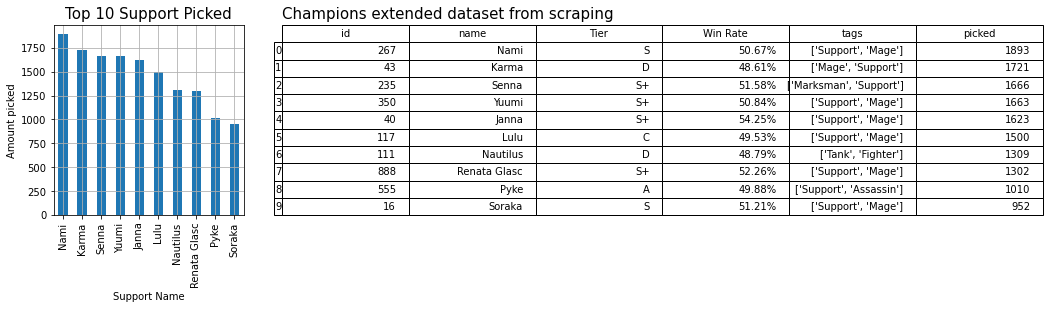

In [111]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1 = top10support.plot(kind='bar')
ax1 = plt.grid(True)
ax1 = plt.ylabel('Amount picked',size=10)
ax1 = plt.xlabel('Support Name',size=10)
ax1 = plt.title('Top 10 Support Picked',size=15)
ax2 = fig.add_subplot(122)
font_size = 10
bbox = [0, 0, 4, 1]
ax2.axis('off')
plt.title(label="Champions extended dataset from scraping", fontsize=15, loc='left')
mpl_table = ax2.table(cellText = top10support_champs.values, rowLabels = top10support_champs.index, bbox=bbox, colLabels=top10support_champs.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

### We can see that the amount of the top 10 champions selected is partially based on Tier/ Win Rate columns that, Other picks we can explain based on our knowledge of the game, for example:
### On top 10 support Karma is second most picked based on 11620 games that we collected data from, We know that the attributes of that champion is that she is valuable to team fights and has abilities that contibutes alot ot the rest of the team. Thats just one example of how we combine multiple data resources and game experience to show cause & effect  relationship

### Next step will be to try to predict a game's duration based on our selected features with Linear regression model

In [165]:
duration_df = no_string_values.copy()
duration_df.dropna()
y = duration_df.gameDuration
X = duration_df.drop(['gameDuration','p_id'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=42)
X.columns

Index(['assists', 'baronKills', 'champLevel', 'damageDealtToObjectives',
       'damageSelfMitigated', 'deaths', 'goldEarned', 'goldSpent',
       'inhibitorTakedowns', 'killingSprees', 'kills', 'largestKillingSpree',
       'longestTimeSpentLiving', 'timeCCingOthers',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
       'turretTakedowns', 'turretsLost', 'visionScore', 'wardsKilled',
       'wardsPlaced', 'win', 'KDA'],
      dtype='object')

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_reg = LinearRegression()
linear_reg.fit(xtrain,ytrain)
y_pred = linear_reg.predict(xtest)
acc_score = linear_reg.score(xtest,ytest)
print('Linear Regression result:\n')
print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(ytest,y_pred))))
print('Accuracy Score Is: {}'.format(acc_score))

Linear Regression result:

RMSE Score: 117.48115764591644
Accuracy Score Is: 0.9028710465115791


### Accuracy score is pretty high so no need to check other model, The conclusion to this prediction is that the factor/features that we chose helped us to predict the game duration  

# Multi-class classification

## Classify a Top Laner champion to match one of the following classes Early/Mid/Late game champion

### In League of Legends there's champions that perform differently based on game duration, for example:
### Some champions in specific lanes can have a tough game start compare to other champions, 
### but as game goes on he  can surpass other champions and perform better - The difference comes from variety of resources such as 
### Experience that affects the champion level, items purchased. both coming from farming minions or jungle camps, getting objectives, kill participation, collecting bounties and so on..

In [167]:
#Lets try to classify our Top Laners data to Early/Mid/Late Game champions
top_laners = with_team_stats[with_team_stats['individualPosition'].isin(["TOP"])]
top_laners.columns
top_laners = top_laners.drop(['p_id','individualPosition'], axis=1)

## Now Lets visualize some data with some graphs

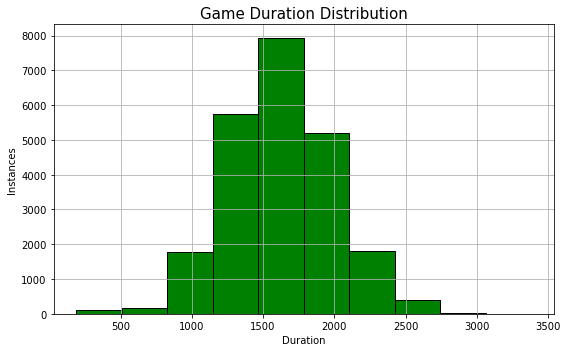

In [116]:
plt.figure(figsize=(8,5))
plt.title('Game Duration Distribution',fontsize=15)
plt.xlabel("Duration",fontsize=10)
plt.ylabel("Instances",fontsize=10)
plt.grid(True)
plt.hist(top_laners.gameDuration,color='green',edgecolor='k')
plt.show()

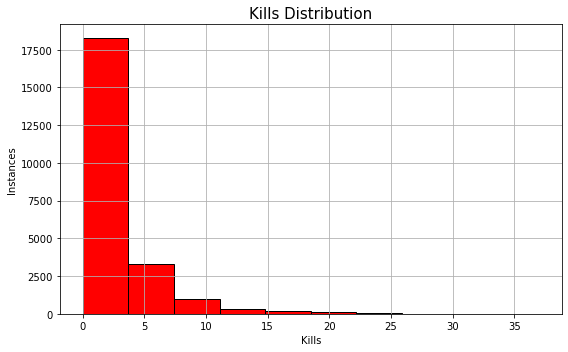

In [117]:
plt.figure(figsize=(8,5))
plt.title('Kills Distribution',fontsize=15)
plt.xlabel("Kills",fontsize=10)
plt.ylabel("Instances",fontsize=10)
plt.grid(True)
plt.hist(top_laners.KDA,color='red',edgecolor='k')
plt.show()

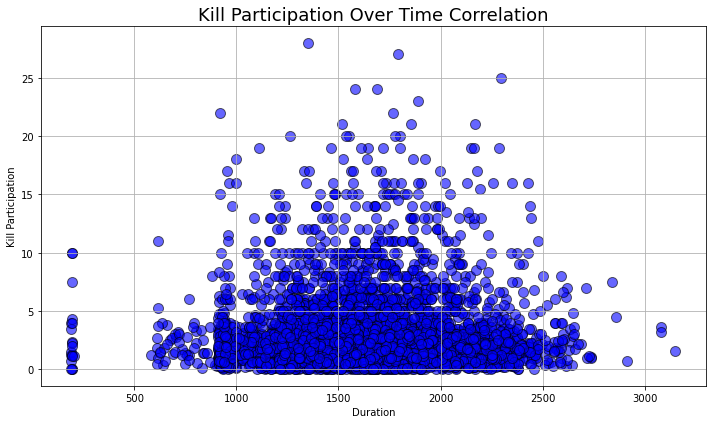

In [118]:
plt.figure(figsize=(10,6))
plt.title("Kill Participation Over Time Correlation",fontsize=18)
plt.grid(True)
plt.xlabel("Duration",fontsize=10)
plt.ylabel("Kill Participation",fontsize=10)
plt.scatter(top_laners['gameDuration'].sample(5000),top_laners['KDA'].sample(5000),color='blue',alpha=0.6,s=100,edgecolors='k')
plt.show()
# What we see here - outliers explain in manner of data science and lol player

In [170]:
sample = top_laners.iloc[:,[10,29]].sample(300).values
print("The features that we are going to inspect are ",top_laners.keys()[10],"&" ,top_laners.keys()[29])

The features that we are going to inspect are  kills & gameDuration


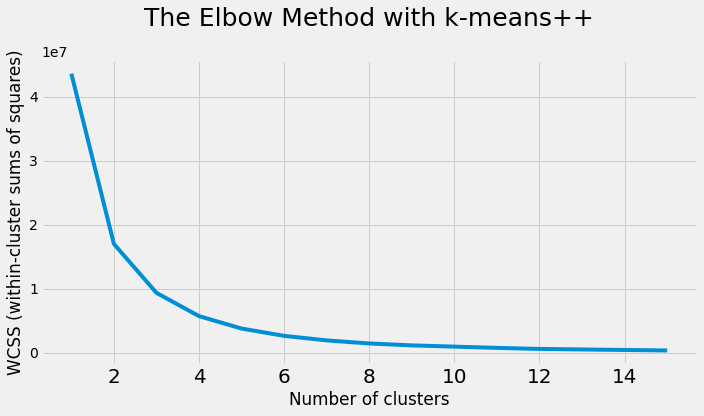

In [171]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(sample)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.text(x=5.5,y=5000000, fontsize=25,fontdict={'family':'serif'},s="")
    plt.show()

### Seems like 3 clusters is the optimal amount of clusters as we approached earlier, So the clusters will be: Early/Mid/Late game 

In [176]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(sample)

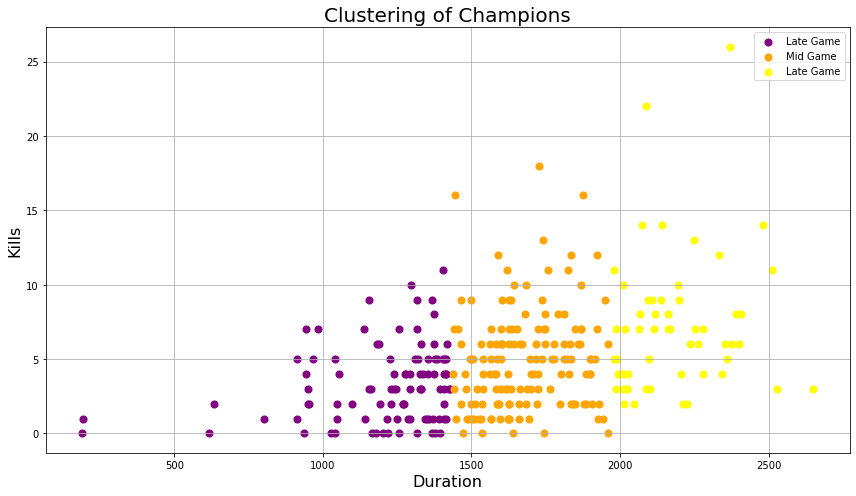

In [179]:
plt.figure(figsize=(12,7))
plt.scatter(sample[y_hc == 0, 1],sample[y_hc == 0, 0] , s = 50, c = 'purple',label = 'Late Game')
plt.scatter(sample[y_hc == 1, 1],sample[y_hc == 1, 0] , s = 50, c = 'orange',label = 'Mid Game')
plt.scatter(sample[y_hc == 2, 1],sample[y_hc == 2, 0] , s = 50, c = 'yellow',label = 'Late Game')
plt.title('Clustering of Champions',fontsize=20)
plt.xlabel('Duration',fontsize=16)
plt.ylabel('Kills',fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [180]:
Image(url = 'https://images2.alphacoders.com/611/thumb-1920-611981.jpg')